In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier


In [2]:
df=pd.read_csv(r"C:\Users\nice\Desktop\m\data\model Data.csv")

In [3]:
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,service_plus
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,2,29.85,29.85,0,1
1,1,1,0,0,0,34,1,0,0,1,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,2,1,0,0,0,2,1,0,0,1,...,0,0,0,0,1,3,53.85,108.15,1,1
3,3,1,0,0,0,45,0,0,0,1,...,1,0,0,1,0,0,42.30,1840.75,0,1
4,4,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,1,0,1,1,24,1,1,0,1,...,1,1,1,1,1,3,84.80,1990.50,0,1
7028,7039,0,0,1,1,72,1,1,1,0,...,0,1,1,1,1,1,103.20,7362.90,0,1
7029,7040,0,0,1,1,11,0,0,0,1,...,0,0,0,0,1,2,29.60,346.45,0,1
7030,7041,1,1,1,0,4,1,1,1,0,...,0,0,0,0,1,3,74.40,306.60,1,0


In [4]:
x=df.drop(columns=["Churn","Unnamed: 0"])
y=df["Churn"]
x_trian,x_test,y_trian,y_test=train_test_split(x,y,random_state=42,train_size=.8,test_size=.2)

In [5]:
model_Xg = XGBClassifier()
model_Xg.fit(x_trian,y_trian)
y_pred_xg=model_Xg.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Classification Report:\n", classification_report(y_test, y_pred_xg))

XGBoost Accuracy: 0.7640369580668088
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



In [6]:
model_Xg_cv = XGBClassifier(colsample_bytree=0.8,gamma=0,learning_rate=0.05,max_depth=3,n_estimators=300,subsample=1,scale_pos_weight=(y_trian.value_counts()[0] / y_trian.value_counts()[1]),)
model_Xg_cv.fit(x_trian,y_trian)
y_pred_xg_cv=model_Xg_cv.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xg_cv))
print("Classification Report:\n", classification_report(y_test, y_pred_xg_cv))

XGBoost Accuracy: 0.7221037668798863
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



<Figure size 1000x800 with 0 Axes>

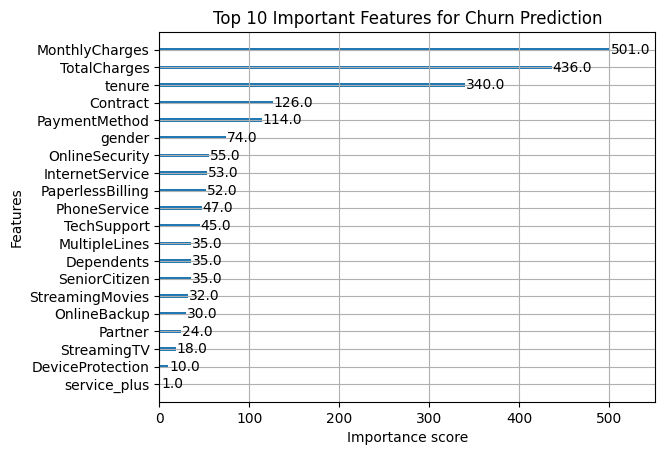

In [7]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plot_importance(model_Xg_cv)
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()


In [9]:
import joblib
joblib.dump(model_Xg_cv,r"C:\Users\nice\Desktop\m\models\churn_model.pkl")


['C:\\Users\\nice\\Desktop\\m\\models\\churn_model.pkl']